# Aggregated Returns
Compute the aggregated return composed by multiple time series with different weights.

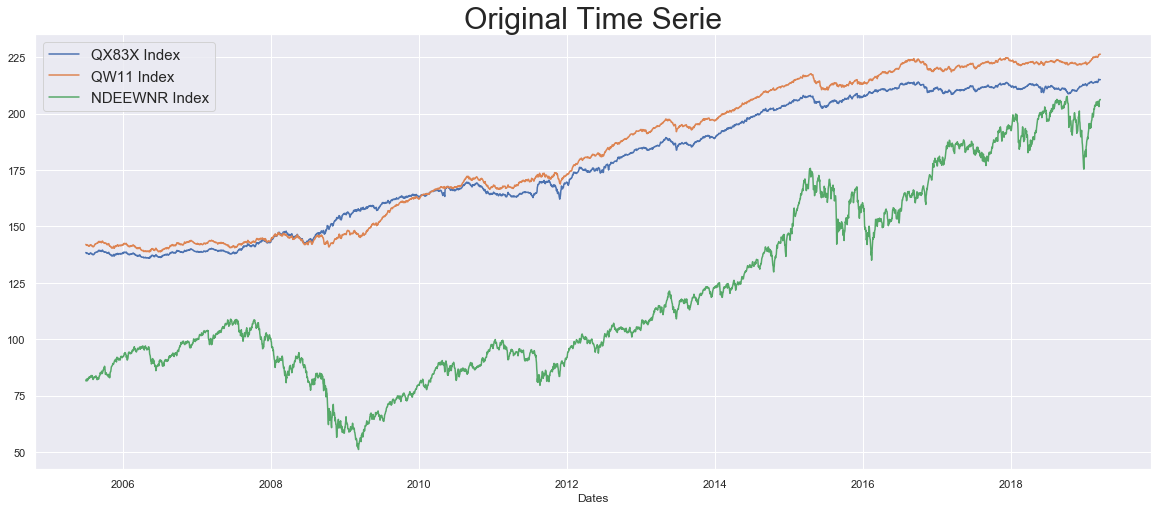

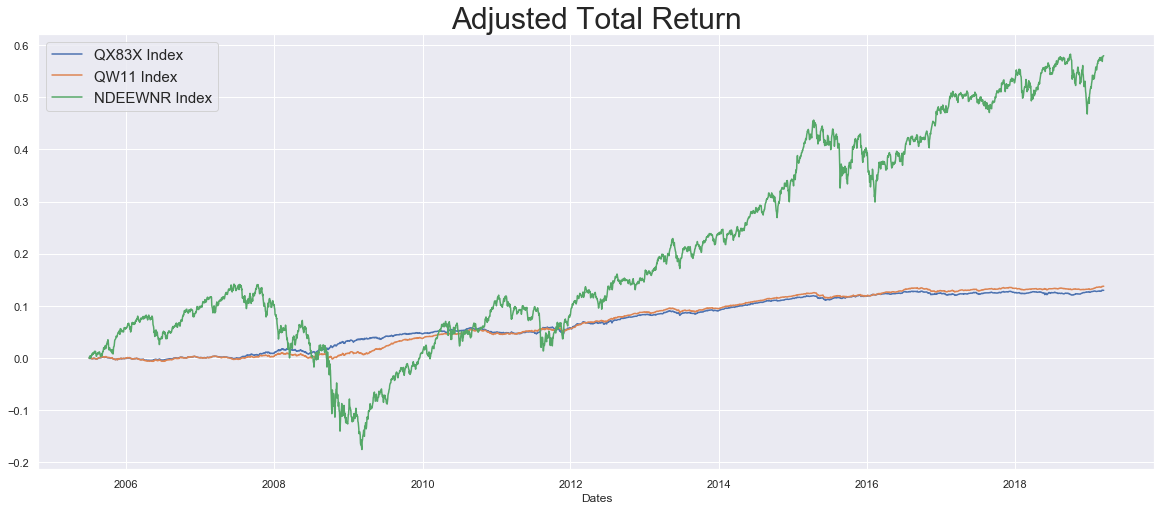

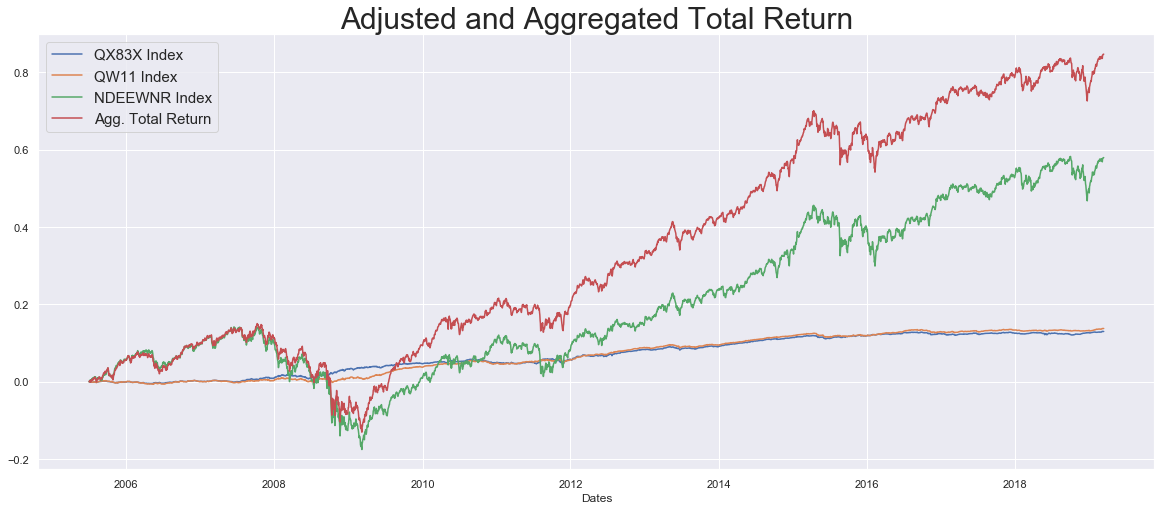

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

_security_filename = './Data/data.xlsx'
_figsize = (20,8)

def get_name():
    return pd.read_excel(_security_filename, skiprows=3, nrows=1).columns[1:].tolist()

def get_weight():
    return pd.read_excel(_security_filename, skiprows=3, nrows=1).iloc[:,1:]
    
def get_timeserie():
    df = pd.read_excel(_security_filename, skiprows=6, index_col='Dates').dropna()
    df.columns = get_name()
    return df

def agg_timeserie(timeserie, agg_name):
    timeserie[agg_name] = timeserie.sum(axis=1)
    return timeserie

def adjust_timeserie(timeserie, weight):
    pct_change = timeserie.pct_change()
    adj_timeserie = timeserie.copy()
    for col in range(adj_timeserie.shape[1]):
        adj_timeserie.iloc[:,col] = 1
        for row in range(1, adj_timeserie.shape[0]):
            adj_timeserie.iloc[row, col] = adj_timeserie.iloc[row-1, col] * (1+pct_change.iloc[row, col]*weight.iloc[0,col])
        adj_timeserie.iloc[:,col] = adj_timeserie.iloc[:,col] - 1
    return adj_timeserie


def plot_timeserie(df, title):
    df.plot(figsize=_figsize)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=15)
    plt.show()

# Get time serie
timeserie = get_timeserie()

# Get weight for each time serie
weight = get_weight()

# Plot original time serie
plot_timeserie(timeserie, 'Original Time Serie')

# Adjust time serie
adj_timeserie = adjust_timeserie(timeserie, weight)

# Plot adjusted time serie
plot_timeserie(adj_timeserie, 'Adjusted Total Return')

# Aggregate time serie
agg_timeserie = agg_timeserie(adj_timeserie, 'Agg. Total Return')

# Plot adjusted and aggregated time serie
plot_timeserie(adj_timeserie, 'Adjusted and Aggregated Total Return')